In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline

In [3]:
df = pd.read_csv(
    "data/apple_stock.csv",
    index_col='Date',
    parse_dates=True
)

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


## Visualizing (with using matplotlib)

#### 1) secondary_y

보고자 하는 두 데이터의 variation 이 다를 경우, 이를 한 눈에 보기가 힘듦.  
이 때 secondary_y 인자를 넣어줘야 함

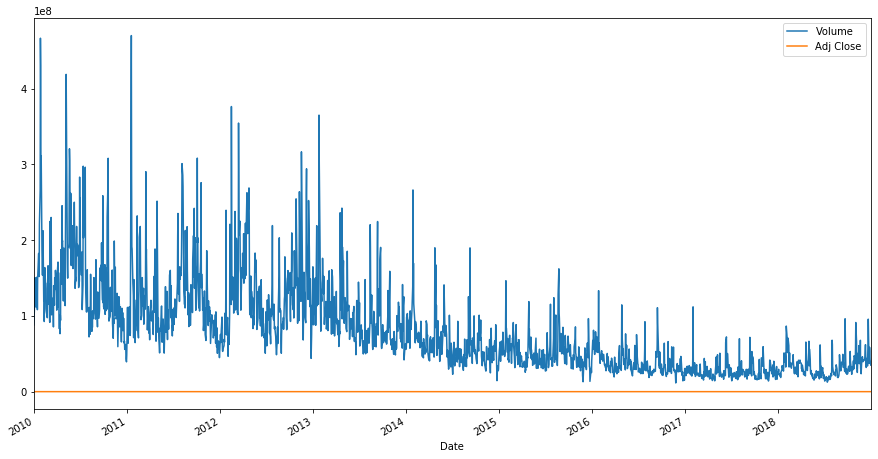

In [8]:
df[['Volume', 'Adj Close']].plot(figsize=(15, 8))

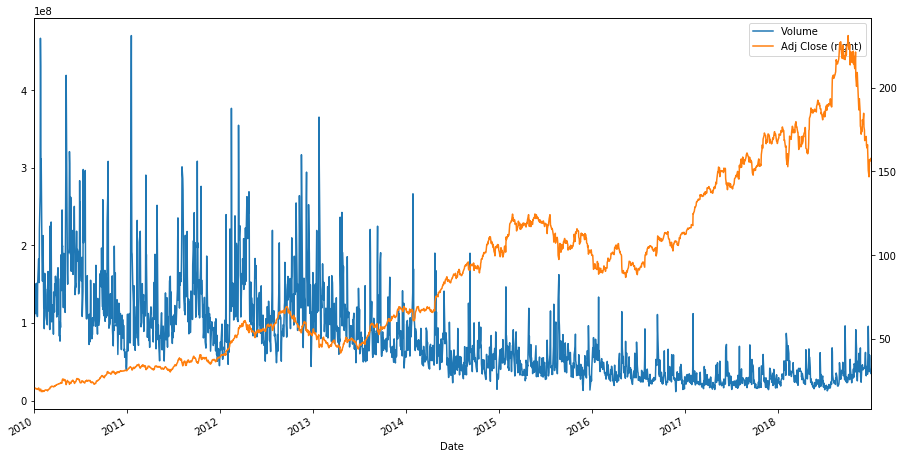

In [9]:
df[['Volume', 'Adj Close']].plot(figsize=(15, 8), secondary_y=['Adj Close'])

#### 2) figsize 조정, xlabel, ylabel, title 추가

Text(0.5, 1.0, 'Apple Stock')

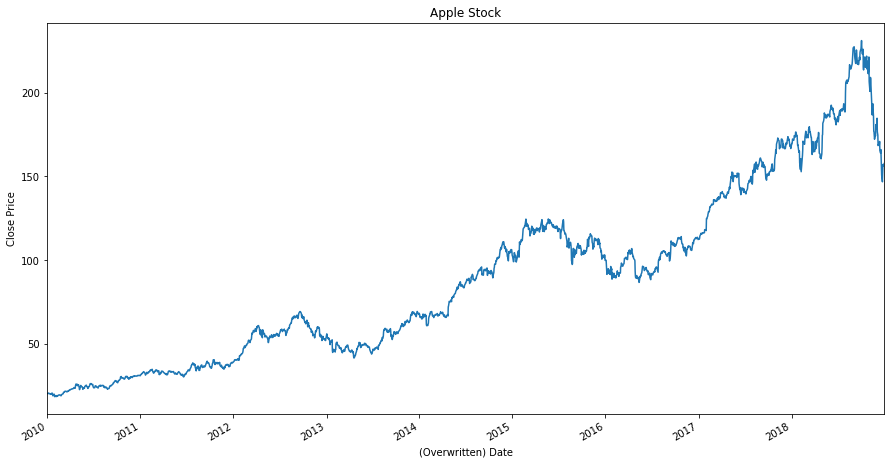

In [10]:
df['Adj Close'].plot(figsize=(15, 8))
plt.ylabel('Close Price')
plt.xlabel('(Overwritten) Date')
plt.title('Apple Stock')

#### 3) xlim, ylim

xlim, ylim 변수를 통해 variation 의 limit 을 제한할 수 있음

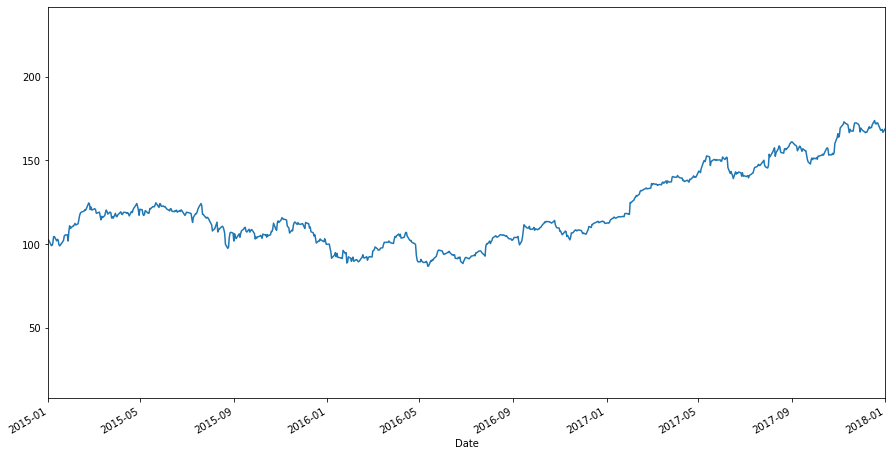

In [14]:
# xlim
df['Adj Close'].plot(
    figsize=(15, 8),
    xlim=['2015-01-01', '2018-01-01']
)

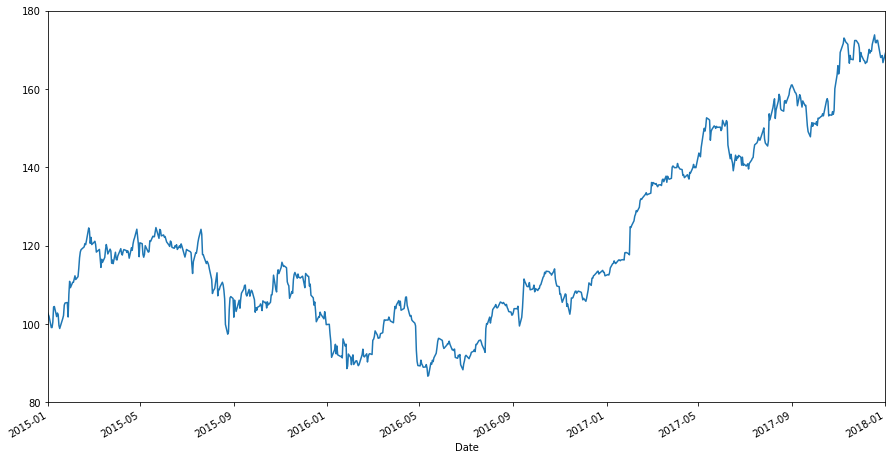

In [15]:
# ylim
df['Adj Close'].plot(
    figsize=(15, 8),
    xlim=['2015-01-01', '2018-01-01'],
    ylim=[80, 180]
)

#### 4) fix the overlap

In [16]:
idx = df.loc['2015-01-01':'2018-01-01'].index
stock = df.loc['2015-01-01':'2018-01-01']['Adj Close']

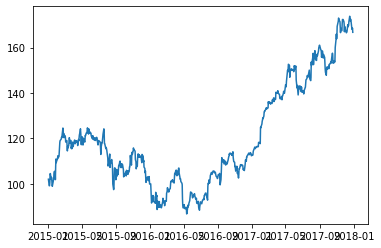

In [30]:
# Default plot
fig, ax = plt.subplots()
ax.plot_date(
    x=idx,
    y=stock,
    fmt='-'
)  # plot_date 는 date 타입이 포함된 데이터를 plot 해 줌
plt.show()

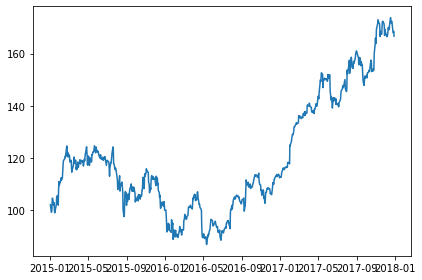

In [31]:
# tight_layout()
fig, ax = plt.subplots()
ax.plot_date(
    x=idx,
    y=stock,
    fmt='-'
)
plt.tight_layout()  # 최대한 겹치지 않게 해 줌
plt.show()

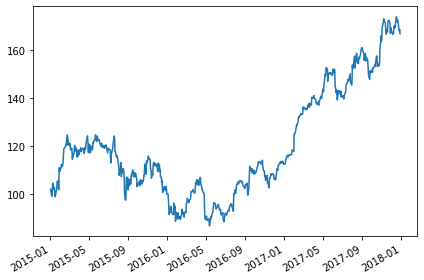

In [36]:
# autofmt_xdate()
fig, ax = plt.subplots()
fig.autofmt_xdate()  # 겹치는 label 을 자동으로 기울여서 겹치지 않게 함

ax.plot_date(
    x=idx,
    y=stock,
    fmt='-'
)
plt.tight_layout()
plt.show()

#### 5) grid

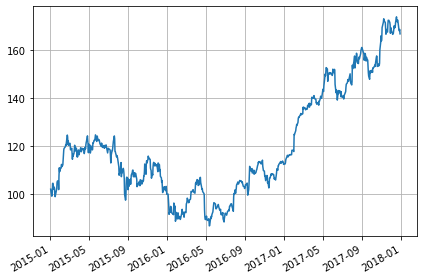

In [41]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot_date(
    x=idx,
    y=stock,
    fmt='-'
)
ax.xaxis.grid(True)
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

#### 6) format date

In [47]:
idx = df.loc['2018-01-01':].index
stock = df.loc['2018-01-01':]['Adj Close']

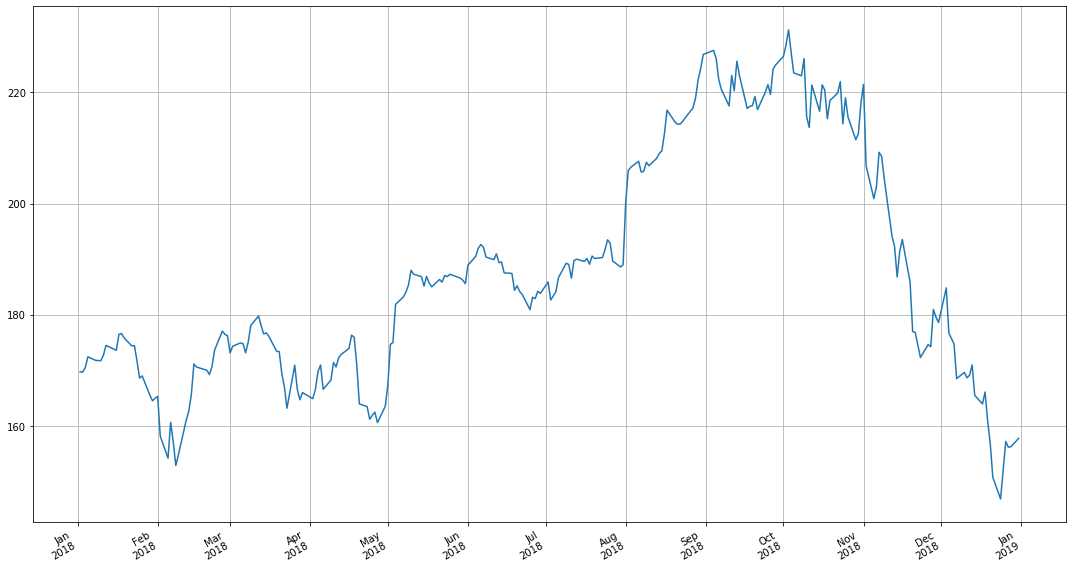

In [50]:
# Major formatter
fig, ax = plt.subplots(
    figsize=(15, 8)
)
fig.autofmt_xdate()

ax.plot_date(
    x=idx,
    y=stock,
    fmt='-'
)
# Major axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y'))

ax.xaxis.grid(True)
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

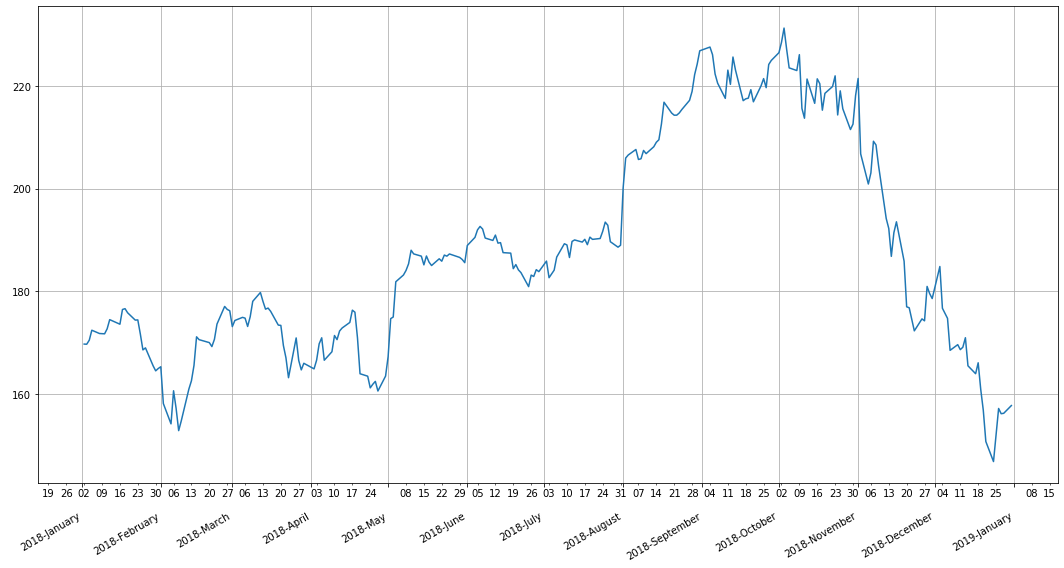

In [57]:
# Minor formatter
fig, ax = plt.subplots(
    figsize=(15, 8)
)
fig.autofmt_xdate()

ax.plot_date(
    x=idx,
    y=stock,
    fmt='-'
)
# Major axis
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n%Y-%B'))

# Minor axis
ax.xaxis.set_minor_locator(dates.WeekdayLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

ax.xaxis.grid(True)  # Grid 는 major 기준으로 그려짐
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()